---
<h2 align="center"> Cáncer de mama Wisconsin</h2>

#### Oscar Julian Layton
---


## Etapa 1: Entendimiento de los datos

Estos campos estan asociados con características observadas en células tumorales y se utilizan para predecir la clasificación de la muestra como benigna o maligna. Las variables del conjunto de datos están caracterizadas de esta forma:

* **Sample code number:** Número único que identifica a cada muestra.
* **Clump Thickness:** Evaluación del espesor del cúmulo de células.        
* **Uniformity of Cell Size:** Evaluación de la uniformidad en el tamaño de las células
* **Uniformity of Cell Shape:** Evaluación de la uniformidad en la forma de las células.
* **Marginal Adhesion:** Evaluación de la adhesión marginal de las células.
* **Single Epithelial Cell Size:** Evaluación del tamaño de una sola célula epitelial.
* **Bare Nuclei:** Evaluación de la presencia de núcleos desnudos.
* **Bland Chromatin:** Evaluación de la suavidad de la cromatina.
* **Normal Nucleoli:** Evaluación de la normalidad de los nucleolos.
* **Mitoses:** Evaluación de la actividad de mitosis.
* **Class:** Clasificación de la muestra como benigna (2) o maligna (4)

### 1.1 Carga del conjunto de datos

Para porceder a la carga del conjunto de datos puede hacerse desde la libreria de la **UCI Machine Learning Repository** llamada `ucimlrepo` o desde un archivo local el cual será una forma más estandar de carga de cualquier archivo en formato .data:

* Forma 1 de carga del conjunto de datos.

In [1]:
#Codigo para importar base de datos directa
from ucimlrepo import fetch_ucirepo 

breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 
X.head(5)

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


* Forma 2 de carga del conjunto de datos.

In [2]:
import pandas as pd

# Reemplaza 'wpbc.data' con la ruta y nombre correctos de tu archivo
ruta_archivo = 'C:\\Users\\ojuul\\Desktop\\MAESTRIA\\2_APRENDIZAJE_AUTOMATICO_PARA_LA_TOMA_DE_DESICIONES\\datos\\breast-cancer-wisconsin.data'

# Lee el archivo usando Pandas
data = pd.read_csv(ruta_archivo,na_values="?")

head = ['Sample_code_number','Clump_thickness','Uniformity_of_cell_size','Uniformity_of_cell_shape','Marginal_adhesion',
        'Single_epithelial_cell_size','Bare_nuclei','Bland_chromatin','Normal_nucleoli','Mitoses','Class']

# Asigna los nombres de las columnas al DataFrame
data.columns = head

data.head()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10.0,3,2,1,2
1,1015425,3,1,1,1,2,2.0,3,1,1,2
2,1016277,6,8,8,1,3,4.0,3,7,1,2
3,1017023,4,1,1,3,2,1.0,3,1,1,2
4,1017122,8,10,10,8,7,10.0,9,7,1,4


In [3]:
data.shape

(698, 11)

El conjunto de datos contiene 698 registros y se caracterizan por las 11 variables descritas en el apartado de entendimiento de los datos. Observemos de que tipo son estas variables:

In [4]:
#Cual es el tipo de los atributos?
data.dtypes

Sample_code_number               int64
Clump_thickness                  int64
Uniformity_of_cell_size          int64
Uniformity_of_cell_shape         int64
Marginal_adhesion                int64
Single_epithelial_cell_size      int64
Bare_nuclei                    float64
Bland_chromatin                  int64
Normal_nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

Se observa que todas las variables son de tipo entero, una de tipo flotante. Generemos un loop que permita identificar cuantos niveles existen en cada una de las variables (observese la siguiente linea de codigo):

In [5]:
# Obtener el número de niveles diferentes para cada variable
for columna in data.columns:
    niveles = data[columna].nunique()
    print(f"Niveles diferentes en '{columna}': {niveles}")

Niveles diferentes en 'Sample_code_number': 644
Niveles diferentes en 'Clump_thickness': 10
Niveles diferentes en 'Uniformity_of_cell_size': 10
Niveles diferentes en 'Uniformity_of_cell_shape': 10
Niveles diferentes en 'Marginal_adhesion': 10
Niveles diferentes en 'Single_epithelial_cell_size': 10
Niveles diferentes en 'Bare_nuclei': 10
Niveles diferentes en 'Bland_chromatin': 10
Niveles diferentes en 'Normal_nucleoli': 10
Niveles diferentes en 'Mitoses': 9
Niveles diferentes en 'Class': 2


In [6]:
#Medida de centralidad y desviación para atributos numéricos:
data.describe()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,682.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.548387,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,3.645226,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


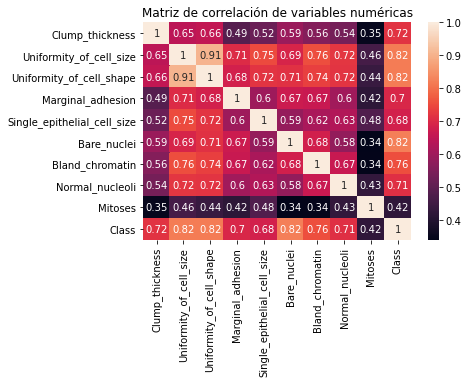

-----------
Pares de variables con correlaciones negativas
-----------
 Series([], dtype: float64)
-----------
Pares de variables con correlaciones POSITIVAS ordenadas
-----------
 Bare_nuclei               Mitoses                     0.339005
Mitoses                   Bare_nuclei                 0.339005
Bland_chromatin           Mitoses                     0.344118
Mitoses                   Bland_chromatin             0.344118
                          Clump_thickness             0.350176
                                                        ...   
Uniformity_of_cell_shape  Class                       0.818794
Bare_nuclei               Class                       0.822563
Class                     Bare_nuclei                 0.822563
Uniformity_of_cell_size   Uniformity_of_cell_shape    0.906814
Uniformity_of_cell_shape  Uniformity_of_cell_size     0.906814
Length: 90, dtype: float64


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'data' es tu DataFrame
correlation_mat = data.iloc[:, 1:].corr()

# Visualización de la matriz de correlación
sns.heatmap(correlation_mat, annot=True)
plt.title("Matriz de correlación de variables numéricas")
plt.show()

# Obtener pares de variables con correlaciones
corr_pairs = correlation_mat.unstack()



# Obtener pares de variables con correlaciones negativas
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
negative_pairs = sorted_pairs[(sorted_pairs < 0) & (sorted_pairs.index.get_level_values(0) != sorted_pairs.index.get_level_values(1))]

print("-----------\nPares de variables con correlaciones negativas\n-----------\n", negative_pairs)


# Filtrar combinaciones donde las variables son diferentes
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Ordenar los pares de variables por correlación
sorted_pairs = corr_pairs.sort_values(ascending=True)

print("-----------\nPares de variables con correlaciones POSITIVAS ordenadas\n-----------\n", sorted_pairs)

* Existe una fuerte correlación entre tamaños de células uniformes, esto es debido a que la correlación entre `Uniformity_of_cell_size` y `Uniformity_of_cell_shape` es muy alta, con un valor de 0.906814. Esto sugiere que hay una fuerte relación positiva entre estas dos variables, indicando posiblemente que el tamaño uniforme de las células está estrechamente asociado con la forma uniforme de las células.
* Existen correlaciones muy fuertes y positivas entre ciertas variables. Por ejemplo, la correlación entre `Uniformity_of_cell_shape` y `Class` es de 0.818794, y la correlación entre `Bare_nuclei` y `Class` es aún más fuerte, con un valor de 0.822563.


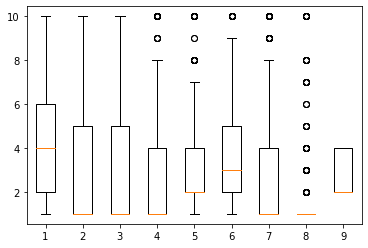

Umbrales para 'Sample_code_number': {'Umbral Inferior': 318114.625, 'Umbral Superior': 1790497.625}
Umbrales para 'Clump_thickness': {'Umbral Inferior': -4.0, 'Umbral Superior': 12.0}
Umbrales para 'Uniformity_of_cell_size': {'Umbral Inferior': -5.0, 'Umbral Superior': 11.0}
Umbrales para 'Uniformity_of_cell_shape': {'Umbral Inferior': -5.0, 'Umbral Superior': 11.0}
Umbrales para 'Marginal_adhesion': {'Umbral Inferior': -3.5, 'Umbral Superior': 8.5}
Umbrales para 'Single_epithelial_cell_size': {'Umbral Inferior': -1.0, 'Umbral Superior': 7.0}
Umbrales para 'Bare_nuclei': {'Umbral Inferior': -6.5, 'Umbral Superior': 13.5}
Umbrales para 'Bland_chromatin': {'Umbral Inferior': -2.5, 'Umbral Superior': 9.5}
Umbrales para 'Normal_nucleoli': {'Umbral Inferior': -3.5, 'Umbral Superior': 8.5}
Umbrales para 'Mitoses': {'Umbral Inferior': 1.0, 'Umbral Superior': 1.0}


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Diagrama de cajas y bigotes para atributos numéricos
# Permite identificar la existencia de datos atípicos
plt.boxplot((data['Clump_thickness'],data['Uniformity_of_cell_size'],data['Uniformity_of_cell_shape'],
             data['Marginal_adhesion'],data['Single_epithelial_cell_size'],# data['Bare_nuclei'],
             data['Bland_chromatin'], data['Normal_nucleoli'], data['Mitoses'] , data['Class']
            ))

plt.show()

# Definimos una función para calcular umbrales mínimos y máximos basados en el IQR
def calcular_umbrales(columna, umbral=1.5):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    umbral_inferior = Q1 - umbral * IQR
    umbral_superior = Q3 + umbral * IQR
    return umbral_inferior, umbral_superior

# Calculamos los umbrales para cada columna
umbrales = {}
for columna in data.columns:
    if columna != 'Class':
        umbral_inferior, umbral_superior = calcular_umbrales(data[columna])
        umbrales[columna] = {'Umbral Inferior': umbral_inferior, 'Umbral Superior': umbral_superior}

# Mostramos los umbrales para cada columna
for columna, valores in umbrales.items():
    print(f"Umbrales para '{columna}': {valores}")

El anterior codigo permite identificar los umbrales por variable. que permiten identificar si un valor puede considerarse atipico o no atipico si se sales de estos umbrales. En la variable `Normal_nucleoli` se observan muchos valores atipicos.

In [9]:
#Medida de centralidad para atributos categóricos:
data.mode()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1182404,1,1,1,1,2,1.0,2,1,1,2


In [10]:
# Correlación entre los atributos de entrada numéricos
# Permite detectar si hay atributos redundantes (correlación mayor a 0.85 o menor a -0.85)
data.corr()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
Sample_code_number,1.000000,-0.055276,-0.041735,-0.041717,-0.065003,-0.045630,-0.099411,-0.060082,-0.052188,-0.034961,-0.080378
Clump_thickness,-0.055276,1.000000,0.645366,0.655089,0.486699,0.522108,0.593524,0.558511,0.536176,0.350176,0.716509
Uniformity_of_cell_size,-0.041735,0.645366,1.000000,0.906814,0.705397,0.751674,0.691487,0.755824,0.722699,0.458548,0.817772
Uniformity_of_cell_shape,-0.041717,0.655089,0.906814,1.000000,0.682871,0.719524,0.713661,0.736066,0.719272,0.438756,0.818794
Marginal_adhesion,-0.065003,0.486699,0.705397,0.682871,1.000000,0.599402,0.670434,0.666759,0.603132,0.417476,0.696605
Single_epithelial_cell_size,-0.045630,0.522108,0.751674,0.719524,0.599402,1.000000,0.585489,0.616108,0.628704,0.478975,0.682618
Bare_nuclei,-0.099411,0.593524,0.691487,0.713661,0.670434,0.585489,1.000000,0.680689,0.584022,0.339005,0.822563
Bland_chromatin,-0.060082,0.558511,0.755824,0.736066,0.666759,0.616108,0.680689,1.000000,0.665914,0.344118,0.756732
Normal_nucleoli,-0.052188,0.536176,0.722699,0.719272,0.603132,0.628704,0.584022,0.665914,1.000000,0.428185,0.712067
Mitoses,-0.034961,0.350176,0.458548,0.438756,0.417476,0.478975,0.339005,0.344118,0.428185,1.000000,0.423008


In [11]:
# Cual es el máximo de datos faltantes en un mismo registro?
# Si hay registros a los que les faltan muchos valores, es mejor eliminarlos.
max(data.isnull().sum(axis=1))

1

In [12]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()

Sample_code_number              0
Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [13]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?

print(data['Class'].value_counts())

2    457
4    241
Name: Class, dtype: int64


## Etapa 2: Preparación de los datos
De acuerdo a lo observado en la etapa 1, se define una secuencia de actividades que modifican los datos para eliminar las situaciones que puedan ser causa de fallo o deficiencia en el proceso de aprendizaje. En este caso se van a realizar las siguientes actividades:


1.   Completar los datos faltantes utilizando la media para atributos numéricos y la moda para atributos categóricos.
2.   Convertir los atributos categóricos a escala numérica.
3.   Normalizar los valores de algunos los atributos.
4.   Balancear las clases eliminando registros de la clase mayoritaria.


Para iniciar, la variable `Bare_nuclei` tiene valores nulos que puede causar problemas a la hora de realizar el debido modelamiento, observese los niveles de la variable en cuestion:

In [15]:
#import numpy as np
##data['Bare_nuclei'] = pd.to_numeric(data['Bare_nuclei'], errors='coerce')
##data['Bare_nuclei'].fillna(0, inplace=True)

In [17]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()

Sample_code_number              0
Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

Considerando que la variable `Bare_nuclei` tiene valores nulos, una forma de imputar la informaciónes diseñar unas líneas de código para poder remplazar los 16 valores nulos con la moda de esta misma variable "Bare_nuclei", proporcionando así una forma rápida y simple de manejar los datos faltantes (vease las siguientes líneas de código). 

In [16]:
#Se reemplazan los datos faltantes (NaN) por la moda de cada atributo.
moda_bare_nuclei = data['Bare_nuclei'].mode()[0]
data["Bare_nuclei"].fillna(moda_bare_nuclei, inplace = True)

Nuevamente observese la cantidad de datos faltantes por variable:

In [21]:
data.isnull().sum()

Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              698 non-null    int64  
 1   Uniformity_of_cell_size      698 non-null    int64  
 2   Uniformity_of_cell_shape     698 non-null    int64  
 3   Marginal_adhesion            698 non-null    int64  
 4   Single_epithelial_cell_size  698 non-null    int64  
 5   Bare_nuclei                  698 non-null    float64
 6   Bland_chromatin              698 non-null    int64  
 7   Normal_nucleoli              698 non-null    int64  
 8   Mitoses                      698 non-null    int64  
 9   Class                        698 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


Algo importante a caracterizar en el conjunto de datos es el hecho de tener una variable de etiqueta `Sample_code_number` , esta variable no nos proporciona mayor información en un modelo y/o análisis a desarrollar, dado que es una etiqueta unica en los datos. Por tal motivo se procede a eliminarla del conjunto de datos: 

In [18]:
#eliminando la columan de indices Sample_code_number
data.drop('Sample_code_number', axis=1, inplace=True)

Observemos cuál es el número de niveles de categorías en cada una de las varialbes que componen el conjunto de datos de cancer:

In [22]:
# Obtener el número de niveles diferentes para cada variable
for columna in data.columns:
    niveles = data[columna].nunique()
    print(f"Niveles diferentes en '{columna}': {niveles}")

Niveles diferentes en 'Clump_thickness': 10
Niveles diferentes en 'Uniformity_of_cell_size': 10
Niveles diferentes en 'Uniformity_of_cell_shape': 10
Niveles diferentes en 'Marginal_adhesion': 10
Niveles diferentes en 'Single_epithelial_cell_size': 10
Niveles diferentes en 'Bare_nuclei': 11
Niveles diferentes en 'Bland_chromatin': 10
Niveles diferentes en 'Normal_nucleoli': 10
Niveles diferentes en 'Mitoses': 9
Niveles diferentes en 'Class': 2


In [22]:
# Se reemplazan los datos faltantes (NaN) por la moda de cada atributo.
#data["Workclass"].fillna("Private", inplace = True)
#data["Occupation"].fillna("Prof-specialty", inplace = True)
#data["Country"].fillna("United-States", inplace = True)
#data.head()

Hasta este momento se ha realizado un proceso de imputación de datos faltantes, un proceso muy útil cuando trabajas con algoritmos de aprendizaje automático es el proceso "Label Encoding" el cual es una técnica para convertir variables categóricas en variables numéricas, lo que facilita la aplicación de algoritmos de aprendizaje automático a conjuntos de datos que contienen este tipo de variables. Considerando lo anterior, hay que tener en cuenta que:


* El Label Encoding asigna números de manera arbitraria a las categorías. No hay implicación de orden o distancia entre las categorías.
* Si las variables categóricas tienen algún tipo de orden o jerarquía, es aconsejable considerar otras técnicas como One-Hot Encoding.
* Es importante tener en cuenta que algunos algoritmos pueden interpretar incorrectamente el Label Encoding como una relación ordinal, y en tales casos, es posible que se prefiera One-Hot Encoding.

Veamos el proceso Label Encoder en el conjunto de datos de cancer:

In [23]:
from sklearn.preprocessing import LabelEncoder 

# Se convierten los atributos categóricos a valores numéricos
labelencoder= LabelEncoder() 
data['Clump_thickness'] = labelencoder.fit_transform(data['Clump_thickness'])
data['Uniformity_of_cell_size'] = labelencoder.fit_transform(data['Uniformity_of_cell_size'])
data['Uniformity_of_cell_shape'] = labelencoder.fit_transform(data['Uniformity_of_cell_shape'])
data['Marginal_adhesion'] = labelencoder.fit_transform(data['Marginal_adhesion'])
data['Single_epithelial_cell_size'] = labelencoder.fit_transform(data['Single_epithelial_cell_size'])
data['Bare_nuclei'] = labelencoder.fit_transform(data['Bare_nuclei'])
data['Bland_chromatin'] = labelencoder.fit_transform(data['Bland_chromatin'])
data['Normal_nucleoli'] = labelencoder.fit_transform(data['Normal_nucleoli'])
data['Mitoses'] = labelencoder.fit_transform(data['Mitoses'])
data['Class'] = labelencoder.fit_transform(data['Class'])
data.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,4,3,3,4,6,9,2,1,0,0
1,2,0,0,0,1,1,2,0,0,0
2,5,7,7,0,2,3,2,6,0,0
3,3,0,0,2,1,0,2,0,0,0
4,7,9,9,7,6,9,8,6,0,1


In [178]:
#from sklearn import preprocessing

# Se normalizan los tres atributos seleccionados
#data['Fnlwgt'] = preprocessing.scale(data['Fnlwgt'])
#data['Capital-gain'] = preprocessing.scale(data['Capital-gain'])
#data['Capital-loss'] = preprocessing.scale(data['Capital-loss'])
#data.head()

El balanceo de clases es un aspecto crítico en modelos de aprendizaje automático, especialmente en problemas de clasificación donde las clases no están representadas de manera equitativa en el conjunto de datos. En situaciones donde una clase es significativamente más frecuente que otra, los modelos pueden mostrar tendencias hacia la predicción de la clase mayoritaria, ignorando la clase minoritaria. Esto puede llevar a resultados sesgados y poco representativos, especialmente en problemas donde la clase minoritaria es de particular interés.  

Cuando se trabaja con conjuntos de datos relacionados con el cáncer, se enfrenta a desafíos específicos debido a la naturaleza desigual de las clases. veamos este proceso en las siguientes líneas de código:

In [24]:
# Se hace balanceo de clases eliminando ejemplos de la clase mayoritaria
g = data.groupby('Class')
dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
dataBal

Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
Class                                                                           
0     0                  3                        0                         0   
      1                  1                        0                         0   
      2                  2                        0                         2   
      3                  0                        0                         0   
      4                  0                        0                         0   
...                    ...                      ...                       ...   
1     236                6                        5                         5   
      237                5                        7                         6   
      238                4                        7                         8   
      239                9                        4                         7   
      240                9                        3                         2   

           Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
Class                                                                    
0     0                    1                            1            0   
      1                    0                            1            0   
      2                    0                            1            0   
      3                    0                            1            0   
      4                    2                            1            0   
...                      ...                          ...          ...   
1     236                  2                            1            9   
      237                  7                            5            7   
      238                  3                            2            9   
      239                  9                            2            9   
      240                  9                            2            9   

           Bland_chromatin  Normal_nucleoli  Mitoses  Class  
Class                                                        
0     0                  0                0        0      0  
      1                  2                0        0      0  
      2                  1                0        0      0  
      3                  1                0        0      0  
      4                  0                0        0      0  
...                    ...              ...      ...    ...  
1     236                6                0        0      1  
      237                7                8        0      1  
      238                6                0        0      1  
      239                4                0        2      1  
      240                6                0        1      1  

[482 rows x 10 columns]

El anterior código agrupa las observaciones por clase y realiza un muestreo aleatorio para cada clase, asegurándose de que cada clase tenga el mismo número de observaciones, que es el número mínimo de observaciones entre todas las clases. Esto se hace para abordar el desbalanceo de clases en el conjunto de datos original.

In [25]:
# Se verifica que haya quedado el mismo número de registros por cada clase
print(dataBal['Class'].value_counts())

0    241
1    241
Name: Class, dtype: int64


## Etapa 3: Modelado
En esta etapa se van a utilizar los datos para realizar aprendizaje del atributo **Class** a partir de los valores de los demás atributos. Es decir, se va a predecir si una muestra se puede clasificar como  benigna (2) o maligna (4). Las actividades a realizar son:
1.   Dividir el conjunto de datos en conjuntos de entrenamiento y test.
2.   Realizar el entrenamiento del modelo de regresión logística utilizando para ello el conjunto de entrenamiento.
3.   Aplicar el modelo construido a los datos del conjunto de test.
4.   Cálculo de una métrica de desempeño para evaluar la calidad del modelo en sus prediciones sobre el conjunto de test.


El siguiente código utiliza la función `train_test_split` de la biblioteca scikit-learn para dividir un conjunto de datos balanceado (dataBal) en conjuntos de entrenamiento (X_train, y_train) y prueba (X_test, y_test), luego imprime las dimensiones de estos conjuntos para verificar la operación de división.

In [26]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataBal.drop('Class', axis=1), dataBal.Class, test_size=0.30)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(337, 9) (337,)
(145, 9) (145,)


La elección del porcentaje específico de división entre conjuntos de entrenamiento y prueba (en este caso, 70-30) es una convención común, pero no es una regla estricta. Esta elección puede variar según la naturaleza de los datos.  

La capacidad de distinguir entre casos malignos y benignos es crucial para la toma de decisiones clínicas. En este contexto, nos enfrentamos a un problema de clasificación donde el objetivo es asignar a cada instancia la etiqueta de "maligno" o "benigno". Para abordar este desafío, recurrimos a la potencia de la regresión logística, una técnica de aprendizaje supervisado que se ajusta perfectamente a problemas de clasificación binaria. Ahora bien, la biblioteca scikit-learn proporciona una implementación eficiente y fácil de usar de la regresión logística, lo que facilita la creación y evaluación de modelos predictivos. Vease el siguiente código el cual usa:

* El algoritmo de optimización "lbfgs" (Limited-memory Broyden-Fletcher-Goldfarb-Shanno).
* max_iter=500: Número máximo de iteraciones durante la optimización. Esto evita que el algoritmo se ejecute indefinidamente.
* tol=0.01: Criterio de tolerancia que determina cuándo se considera que la optimización ha convergido.

In [27]:
# Entrenamiento del modelo de clasificación por regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logisticRegr = LogisticRegression(solver="lbfgs", max_iter=500, tol=0.01)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=500, tol=0.01)

Las siguientes líneas de código aplican el modelo de regresión logística construido a los datos de prueba (X_test) para realizar predicciones sobre las etiquetas de clase.  

Después de ejecutar estas líneas de código, la variable predictions contendrá las etiquetas predichas por el modelo de regresión logística para cada muestra en el conjunto de prueba. Estas predicciones pueden ser utilizadas posteriormente para evaluar el rendimiento del modelo en los datos de prueba y compararlas con las etiquetas reales (y_test).

In [28]:
# Aplicación del modelo construido a los datos de test
predictions = logisticRegr.predict(X_test)
predictions

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [29]:
# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de test
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.9724137931034482

El anterior código utiliza la métrica de exactitud (accuracy) para evaluar el rendimiento del modelo de regresión logística en los datos de prueba.  El resultado de accuracy_score es 0.97, esto significa que el modelo ha acertado el 97% de las predicciones en el conjunto de prueba. 

### Referencia

* Wolberg,WIlliam. (1992). Breast Cancer Wisconsin (Original). UCI Machine Learning Repository. https://doi.org/10.24432/C5HP4Z.